In [1]:
%pylab --no-import-all notebook
import warnings
from hmmlearn.hmm import GaussianHMM
import matplotlib.pyplot as plt
import pandas as pd
import Classification as CL
import os
import time
from copy import copy
way = os.getcwd() + "/Data_npy/"
way1 = way + "Chosen ones/"
valid_path = os.getcwd() + "/Validační tabulky/"

Populating the interactive namespace from numpy and matplotlib


In [2]:
trlist = np.load(way + "seznam.npy").tolist()

<IPython.core.display.Javascript object>


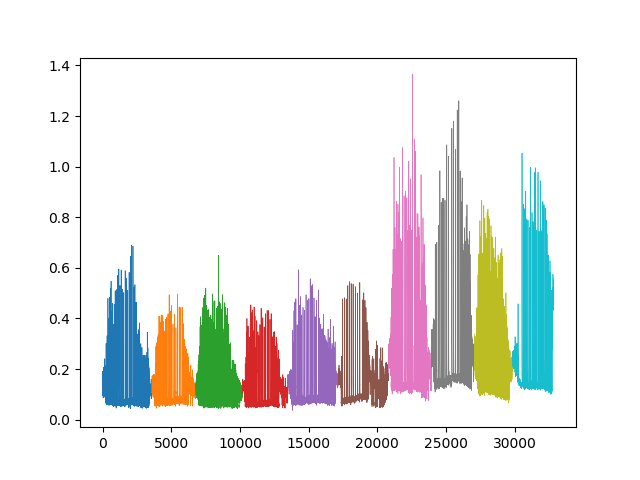

In [3]:
tmp = [np.load(way1 + d)[1] for d in trlist[:-1]]
tmp.append(np.load(way1 + "No11.npy")[1])
plt.figure("Vybraná reálná data")
posun = 0
for i in tmp:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i) 
plt.show()

<IPython.core.display.Javascript object>


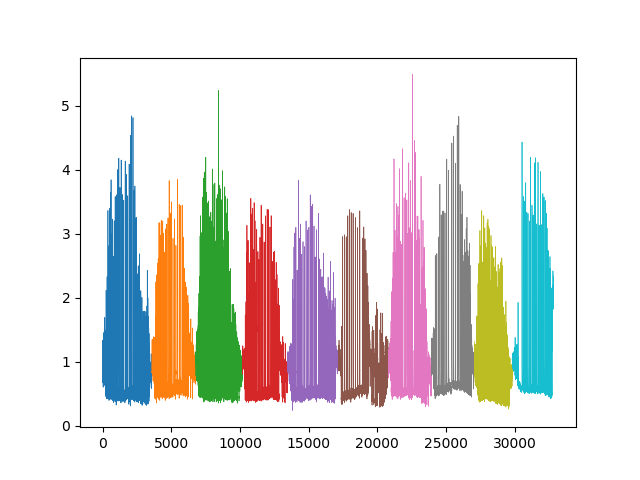

In [4]:
norma = [CL.normalization(np.load(way1 + d)[1] , delka_useku = 20, training_set = True) for d in trlist[:-1]]
norma.append(CL.normalization(np.load(way1 + "No11.npy")[1] , delka_useku = 20, training_set = True))
plt.figure("Vybraná reálná data po normalizaci")
posun = 0
for i in norma:
    plt.plot(np.arange(len(i))+ posun, i, '-', lw=0.5)
    posun = posun +len(i)
plt.show()

In [4]:
train_data = []
test_data = []
for data in trlist[:-1]:
    train_data.append(np.load(way1 + data))

train_data.append(np.load(way1 + "No11.npy"))    
test_data.append(copy(train_data[-1]))

In [5]:
print(len(train_data), len(test_data))

10 1


In [6]:
G_HMM = GaussianHMM(3)

In [7]:
tab = CL.validace_new(G_HMM, train_data[:-1], \
                      test_data, [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5276.142306089401


In [8]:
tab.to_csv(valid_path + 'Real_data_HMM_1_Hm_unsup.csv',index=False)

In [9]:
train_data1 = copy(train_data[:-2])
train_data1.append(copy(train_data[-1]))
len(train_data1)

9

In [10]:
Sorted = tab.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.841667,475,0.947399,0.611429,0.753444,0.770757,0.978158,0.512780,0.804412,0.918514,0.757075,0.708549
2139,"(1, 0, 0, 0, 1)","(0, 0, 0, 12)",0.841000,477,0.947607,0.645793,0.718728,0.770709,0.968732,0.551839,0.770370,0.927384,0.778302,0.673575
2138,"(1, 0, 0, 0, 1)","(0, 0, 0, 11)",0.840000,480,0.948905,0.650841,0.702172,0.767306,0.961320,0.560477,0.764885,0.936807,0.775943,0.648964
2818,"(1, 0, 1, 0, 1)","(0, 0, 12, 13)",0.839667,481,0.946556,0.628180,0.732928,0.769221,0.976991,0.536789,0.766620,0.917960,0.757075,0.702073
2140,"(1, 0, 0, 0, 1)","(0, 0, 0, 13)",0.839333,482,0.945030,0.639614,0.726272,0.770305,0.971880,0.541735,0.774194,0.919623,0.780660,0.683938
2817,"(1, 0, 1, 0, 1)","(0, 0, 12, 12)",0.839000,483,0.949730,0.620290,0.725762,0.765261,0.973791,0.525368,0.779762,0.926829,0.757075,0.678756
2829,"(1, 0, 1, 0, 1)","(0, 0, 14, 12)",0.839000,483,0.948971,0.613767,0.729211,0.763983,0.965577,0.516077,0.807874,0.932927,0.757075,0.664508
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.839000,483,0.944923,0.623301,0.739892,0.769372,0.979191,0.529703,0.771067,0.912971,0.757075,0.711140
2819,"(1, 0, 1, 0, 1)","(0, 0, 12, 14)",0.838333,485,0.941753,0.624514,0.746011,0.770759,0.981370,0.531457,0.766393,0.905211,0.757075,0.726684
8,"(0, 0, 0, 0, 1)","(0, 0, 0, 13)",0.838333,485,0.940851,0.648491,0.708487,0.765943,0.938258,0.552239,0.823328,0.943459,0.785377,0.621762


In [11]:
tab1 = CL.validace_new(G_HMM, train_data1,\
                       [train_data[-2]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


4883.790806055069


In [12]:
tab1.to_csv(valid_path + 'Real_data_HMM_2_Hm_unsup.csv',index=False)

In [13]:
Sorted = tab1.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.781772,601,0.831128,0.726154,0.772747,0.776676,0.857923,0.620237,0.831169,0.805955,0.875696,0.721998
2844,"(1, 0, 1, 0, 1)","(0, 0, 16, 15)",0.779593,607,0.836580,0.706058,0.776582,0.773073,0.884439,0.591479,0.833641,0.793634,0.875696,0.726833
2832,"(1, 0, 1, 0, 1)","(0, 0, 14, 15)",0.778141,611,0.834236,0.698085,0.780382,0.770901,0.883028,0.578755,0.845720,0.790554,0.879406,0.724416
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.774510,621,0.827801,0.726550,0.756245,0.770199,0.836478,0.635605,0.812211,0.819302,0.847866,0.707494
2831,"(1, 0, 1, 0, 1)","(0, 0, 14, 14)",0.774510,621,0.830508,0.711813,0.764732,0.769018,0.857768,0.598734,0.834286,0.804928,0.877551,0.705882
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.774147,622,0.826943,0.727132,0.756119,0.770065,0.834728,0.624501,0.826170,0.819302,0.870130,0.697019
2466,"(1, 0, 0, 1, 1)","(0, 0, 12, 12)",0.773784,623,0.850099,0.707116,0.743124,0.766779,0.817837,0.592965,0.881637,0.885010,0.875696,0.642224
2819,"(1, 0, 1, 0, 1)","(0, 0, 12, 14)",0.772331,627,0.831389,0.707025,0.761821,0.766745,0.859649,0.591990,0.834132,0.804928,0.877551,0.701048
2820,"(1, 0, 1, 0, 1)","(0, 0, 12, 15)",0.769789,634,0.834236,0.686957,0.767748,0.762980,0.883028,0.563615,0.841499,0.790554,0.879406,0.705882
2478,"(1, 0, 0, 1, 1)","(0, 0, 14, 12)",0.769426,635,0.837325,0.713522,0.740774,0.763874,0.814563,0.606494,0.852201,0.861396,0.866419,0.655117


In [14]:
train_data2 = copy(train_data[:-3]) + copy(train_data[-2:])
len(train_data2)

9

In [15]:
tab2 = CL.validace_new(G_HMM, train_data2,\
                       [train_data[-3]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


4944.748641014099


In [16]:
tab2.to_csv(valid_path + 'Real_data_HMM_3_Hm_unsup.csv',index=False)

In [17]:
Sorted = tab2.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2821,"(1, 0, 1, 0, 1)","(0, 0, 12, 16)",0.885540,357,0.946331,0.746518,0.837641,0.843497,0.984055,0.596439,0.917271,0.911392,0.997519,0.770732
2833,"(1, 0, 1, 0, 1)","(0, 0, 14, 16)",0.883617,363,0.944307,0.742382,0.838411,0.841700,0.983991,0.591176,0.917391,0.907700,0.997519,0.771951
2470,"(1, 0, 0, 1, 1)","(0, 0, 12, 16)",0.883296,364,0.947484,0.739650,0.830769,0.839301,0.984091,0.587719,0.920000,0.913502,0.997519,0.757317
2845,"(1, 0, 1, 0, 1)","(0, 0, 16, 16)",0.882655,366,0.943956,0.739650,0.837856,0.840487,0.985092,0.587719,0.916064,0.906118,0.997519,0.771951
2844,"(1, 0, 1, 0, 1)","(0, 0, 16, 15)",0.882013,368,0.948375,0.739650,0.822819,0.836948,0.983569,0.587719,0.914925,0.915612,0.997519,0.747561
2820,"(1, 0, 1, 0, 1)","(0, 0, 12, 15)",0.881693,369,0.946424,0.746518,0.819407,0.837450,0.976979,0.596439,0.915663,0.917722,0.997519,0.741463
2482,"(1, 0, 0, 1, 1)","(0, 0, 14, 16)",0.881372,370,0.946907,0.734317,0.828000,0.836408,0.984073,0.584435,0.913235,0.912447,0.987593,0.757317
2832,"(1, 0, 1, 0, 1)","(0, 0, 14, 15)",0.880731,372,0.946049,0.742382,0.820202,0.836211,0.978579,0.591176,0.915789,0.915612,0.997519,0.742683
2469,"(1, 0, 0, 1, 1)","(0, 0, 12, 15)",0.879128,377,0.946565,0.730909,0.821769,0.833081,0.979684,0.576758,0.929231,0.915612,0.997519,0.736585
2481,"(1, 0, 0, 1, 1)","(0, 0, 14, 15)",0.877845,381,0.945703,0.730419,0.818983,0.831702,0.979650,0.576978,0.922137,0.914030,0.995037,0.736585


In [18]:
train_data3 = copy(train_data[:-4]) + copy(train_data[-3:])
len(train_data3)

9

In [19]:
tab3 = CL.validace_new(G_HMM, train_data3,\
                       [train_data[-4]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


4922.278025150299


In [20]:
tab3.to_csv(valid_path + 'Real_data_HMM_4_Hm_unsup.csv',index=False)

In [21]:
Sorted = tab3.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2844,"(1, 0, 1, 0, 1)","(0, 0, 16, 15)",0.827070,543,0.902788,0.744924,0.783841,0.810517,0.951054,0.635970,0.840270,0.859184,0.898928,0.734513
2845,"(1, 0, 1, 0, 1)","(0, 0, 16, 16)",0.826752,544,0.898624,0.739021,0.796258,0.811301,0.960526,0.625930,0.844542,0.844218,0.901991,0.753196
2832,"(1, 0, 1, 0, 1)","(0, 0, 14, 15)",0.826115,546,0.902213,0.744451,0.781694,0.809453,0.948949,0.635281,0.840498,0.859864,0.898928,0.730580
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.825796,547,0.904281,0.760417,0.758952,0.807883,0.925873,0.661382,0.831382,0.883673,0.894334,0.698132
2833,"(1, 0, 1, 0, 1)","(0, 0, 14, 16)",0.825478,548,0.897900,0.737304,0.794592,0.809932,0.959752,0.624204,0.843267,0.843537,0.900459,0.751229
2827,"(1, 0, 1, 0, 1)","(0, 0, 14, 10)",0.823885,553,0.910672,0.768824,0.724817,0.801438,0.895984,0.675958,0.847368,0.925850,0.891271,0.633235
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.823885,553,0.900625,0.753968,0.762963,0.805852,0.920455,0.663562,0.825888,0.881633,0.872894,0.708948
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.823885,553,0.900211,0.746230,0.772132,0.806191,0.930959,0.652523,0.826233,0.871429,0.871363,0.724680
2831,"(1, 0, 1, 0, 1)","(0, 0, 14, 14)",0.823248,555,0.903453,0.748072,0.764581,0.805369,0.937135,0.644518,0.829689,0.872109,0.891271,0.708948
2839,"(1, 0, 1, 0, 1)","(0, 0, 16, 10)",0.822930,556,0.918449,0.750000,0.723624,0.797358,0.902760,0.649832,0.867950,0.934694,0.886677,0.620452


In [22]:
train_data4 = copy(train_data[:-5]) + copy(train_data[-4:])
len(train_data4)

9

In [23]:
tab4 = CL.validace_new(G_HMM, train_data4,\
                       [train_data[-5]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5171.264974117279


In [24]:
tab4.to_csv(valid_path + 'Real_data_HMM_5_Hm_unsup.csv',index=False)

In [25]:
Sorted = tab4.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.845036,565,0.926984,0.792995,0.694163,0.804714,0.952174,0.696922,0.827458,0.903093,0.919792,0.597855
707,"(0, 0, 1, 0, 1)","(0, 0, 16, 10)",0.843390,571,0.919878,0.818098,0.634518,0.790831,0.905190,0.734660,0.860092,0.935052,0.922917,0.502681
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.843116,572,0.928342,0.783724,0.700232,0.804100,0.964444,0.681015,0.829358,0.894845,0.922917,0.605898
710,"(0, 0, 1, 0, 1)","(0, 0, 16, 13)",0.842019,576,0.919772,0.802697,0.665004,0.795824,0.923597,0.705929,0.875274,0.915979,0.930208,0.536193
2137,"(1, 0, 0, 0, 1)","(0, 0, 0, 10)",0.841744,577,0.918453,0.818890,0.652140,0.796494,0.931601,0.731368,0.777365,0.905670,0.930208,0.561662
2827,"(1, 0, 1, 0, 1)","(0, 0, 14, 10)",0.841196,579,0.918605,0.815741,0.627551,0.787299,0.901290,0.734167,0.858140,0.936598,0.917708,0.494638
2839,"(1, 0, 1, 0, 1)","(0, 0, 16, 10)",0.840922,580,0.920457,0.810886,0.632464,0.787936,0.907769,0.727649,0.848758,0.933505,0.915625,0.504021
708,"(0, 0, 1, 0, 1)","(0, 0, 16, 11)",0.840922,580,0.918878,0.807959,0.647399,0.791412,0.909596,0.726894,0.843011,0.928351,0.909375,0.525469
706,"(0, 0, 1, 0, 1)","(0, 0, 16, 9)",0.840373,582,0.920050,0.817343,0.610871,0.782755,0.900741,0.733444,0.857143,0.940206,0.922917,0.474531
2826,"(1, 0, 1, 0, 1)","(0, 0, 14, 9)",0.839824,584,0.917671,0.821445,0.607051,0.782056,0.894325,0.743460,0.846523,0.942268,0.917708,0.473190


In [26]:
train_data5 = copy(train_data[:-6]) + copy(train_data[-5:])
len(train_data5)

9

In [27]:
tab5 = CL.validace_new(G_HMM, train_data5,\
                       [train_data[-6]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5147.3021330833435


In [28]:
tab5.to_csv(valid_path + 'Real_data_HMM_6_Hm_unsup.csv',index=False)

In [29]:
Sorted = tab5.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2841,"(1, 0, 1, 0, 1)","(0, 0, 16, 12)",0.874011,462,0.950712,0.740132,0.783887,0.824910,0.946512,0.594452,0.947368,0.954951,0.980392,0.668524
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.873739,463,0.942830,0.747126,0.802920,0.830959,0.957426,0.599473,0.915577,0.928672,0.991285,0.714949
2491,"(1, 0, 0, 1, 1)","(0, 0, 16, 13)",0.871830,470,0.951157,0.730081,0.781370,0.820869,0.947393,0.582361,0.953209,0.954951,0.978214,0.662024
2831,"(1, 0, 1, 0, 1)","(0, 0, 14, 14)",0.871284,472,0.943387,0.742857,0.794751,0.826998,0.956585,0.593995,0.914251,0.930549,0.991285,0.702878
2844,"(1, 0, 1, 0, 1)","(0, 0, 16, 15)",0.871284,472,0.944031,0.730924,0.804777,0.826577,0.967028,0.578880,0.912839,0.922102,0.991285,0.719591
2832,"(1, 0, 1, 0, 1)","(0, 0, 14, 15)",0.871012,473,0.944084,0.731511,0.802912,0.826169,0.966110,0.579618,0.912530,0.923041,0.991285,0.716806
2820,"(1, 0, 1, 0, 1)","(0, 0, 12, 15)",0.871012,473,0.944111,0.732100,0.802289,0.826167,0.965653,0.580357,0.912426,0.923510,0.991285,0.715877
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.870739,474,0.941814,0.755814,0.784085,0.827238,0.945601,0.610738,0.914604,0.938057,0.991285,0.686165
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.869921,477,0.942817,0.746071,0.786054,0.824981,0.949548,0.601333,0.911765,0.936180,0.982571,0.690808
2819,"(1, 0, 1, 0, 1)","(0, 0, 12, 14)",0.869648,478,0.942715,0.741042,0.790943,0.824900,0.955202,0.591678,0.913625,0.930549,0.991285,0.697307


In [30]:
train_data6 = copy(train_data[:-7]) + copy(train_data[-6:])
len(train_data6)

9

In [31]:
tab6 = CL.validace_new(G_HMM, train_data6,\
                       [train_data[-7]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5106.960306882858


In [32]:
tab6.to_csv(valid_path + 'Real_data_HMM_7_Hm_unsup.csv',index=False)

In [33]:
Sorted = tab6.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2839,"(1, 0, 1, 0, 1)","(0, 0, 16, 10)",0.822537,589,0.890423,0.747292,0.761094,0.799603,0.911494,0.616071,0.915205,0.870305,0.949541,0.651405
2466,"(1, 0, 0, 1, 1)","(0, 0, 12, 12)",0.821934,591,0.885992,0.746746,0.770909,0.801215,0.916562,0.609073,0.923077,0.857394,0.964832,0.661811
2840,"(1, 0, 1, 0, 1)","(0, 0, 16, 11)",0.820729,595,0.880538,0.752427,0.772277,0.801747,0.918419,0.623742,0.876984,0.845657,0.948012,0.689906
2827,"(1, 0, 1, 0, 1)","(0, 0, 14, 10)",0.820729,595,0.881244,0.762431,0.756303,0.799993,0.898719,0.636923,0.893617,0.864437,0.949541,0.655567
2478,"(1, 0, 0, 1, 1)","(0, 0, 14, 12)",0.819825,598,0.884287,0.742379,0.770970,0.799212,0.918987,0.609421,0.900000,0.852113,0.949541,0.674298
2841,"(1, 0, 1, 0, 1)","(0, 0, 16, 12)",0.819223,600,0.874381,0.754079,0.778983,0.802481,0.924738,0.623377,0.863291,0.829225,0.954128,0.709677
2829,"(1, 0, 1, 0, 1)","(0, 0, 14, 12)",0.819223,600,0.873500,0.757741,0.776119,0.802453,0.918447,0.628399,0.865557,0.832746,0.954128,0.703434
711,"(0, 0, 1, 0, 1)","(0, 0, 16, 14)",0.818319,603,0.874774,0.748244,0.776119,0.799712,0.898022,0.606262,0.964451,0.852700,0.977064,0.649324
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.817114,607,0.874259,0.744186,0.782460,0.800302,0.933378,0.609971,0.864151,0.822183,0.954128,0.714880
2828,"(1, 0, 1, 0, 1)","(0, 0, 14, 11)",0.816812,608,0.872905,0.760563,0.763341,0.798936,0.908053,0.634321,0.862385,0.840376,0.949541,0.684703


In [34]:
train_data7 = copy(train_data[:-8]) + copy(train_data[-7:])
len(train_data7)

9

In [35]:
tab7 = CL.validace_new(G_HMM, train_data7,\
                       [train_data[-8]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5182.763522148132


In [36]:
tab7.to_csv(valid_path + 'Real_data_HMM_8_Hm_unsup.csv',index=False)

In [37]:
Sorted = tab7.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2820,"(1, 0, 1, 0, 1)","(0, 0, 12, 15)",0.813404,632,0.854518,0.751121,0.814971,0.806870,0.968750,0.628518,0.828914,0.764384,0.933148,0.801489
2844,"(1, 0, 1, 0, 1)","(0, 0, 16, 15)",0.812518,635,0.855496,0.743923,0.816479,0.805299,0.974606,0.626070,0.821608,0.762329,0.916435,0.811414
2832,"(1, 0, 1, 0, 1)","(0, 0, 14, 15)",0.811633,638,0.855061,0.744789,0.813885,0.804578,0.971254,0.625355,0.823181,0.763699,0.920613,0.804797
2468,"(1, 0, 0, 1, 1)","(0, 0, 12, 14)",0.811337,639,0.861341,0.746879,0.803223,0.803814,0.957286,0.630268,0.824195,0.782877,0.916435,0.783292
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.810747,641,0.864622,0.746181,0.796497,0.802433,0.952224,0.645325,0.803196,0.791781,0.884401,0.789909
2821,"(1, 0, 1, 0, 1)","(0, 0, 12, 16)",0.809566,645,0.846931,0.737418,0.824621,0.802990,0.978456,0.607207,0.840929,0.746575,0.938719,0.808933
2833,"(1, 0, 1, 0, 1)","(0, 0, 14, 16)",0.808975,647,0.846034,0.736727,0.824421,0.802394,0.978417,0.606853,0.839623,0.745205,0.937326,0.809760
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.808680,648,0.861143,0.735447,0.803840,0.800143,0.961961,0.627335,0.811289,0.779452,0.888579,0.796526
2492,"(1, 0, 0, 1, 1)","(0, 0, 16, 14)",0.808385,649,0.861887,0.740574,0.799318,0.800593,0.959664,0.621341,0.824253,0.782192,0.916435,0.775848
2845,"(1, 0, 1, 0, 1)","(0, 0, 16, 16)",0.808385,649,0.846244,0.732824,0.825812,0.801627,0.980162,0.602151,0.842513,0.744521,0.935933,0.809760


In [38]:
train_data8 = copy(train_data[:-9]) + copy(train_data[-8:])
len(train_data8)

9

In [39]:
tab8 = CL.validace_new(G_HMM, train_data8,\
                       [train_data[-9]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5200.097809791565


In [40]:
tab8.to_csv(valid_path + 'Real_data_HMM_9_Hm_unsup.csv',index=False)

In [41]:
Sorted = tab8.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2828,"(1, 0, 1, 0, 1)","(0, 0, 14, 11)",0.859473,448,0.930717,0.785195,0.784510,0.833474,0.943443,0.669673,0.907514,0.918330,0.948882,0.690869
2841,"(1, 0, 1, 0, 1)","(0, 0, 16, 12)",0.852572,470,0.920854,0.779817,0.788715,0.829795,0.957544,0.661111,0.867900,0.886872,0.950479,0.722772
2840,"(1, 0, 1, 0, 1)","(0, 0, 16, 11)",0.848808,482,0.922701,0.769826,0.771907,0.821478,0.932099,0.645405,0.931571,0.913491,0.953674,0.658966
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.848494,483,0.914684,0.776762,0.790065,0.827171,0.961333,0.656733,0.854220,0.872353,0.950479,0.734873
2815,"(1, 0, 1, 0, 1)","(0, 0, 12, 10)",0.847867,485,0.924233,0.778796,0.750329,0.817786,0.918709,0.659645,0.931485,0.929825,0.950479,0.628163
2829,"(1, 0, 1, 0, 1)","(0, 0, 14, 12)",0.847240,487,0.915414,0.784158,0.774116,0.824563,0.949318,0.668166,0.850000,0.883848,0.948882,0.710671
2816,"(1, 0, 1, 0, 1)","(0, 0, 12, 11)",0.847240,487,0.920890,0.784443,0.759088,0.821474,0.941251,0.667789,0.862745,0.901391,0.950479,0.677668
2490,"(1, 0, 0, 1, 1)","(0, 0, 16, 12)",0.846299,490,0.930175,0.754958,0.763124,0.816086,0.946183,0.629669,0.912711,0.914701,0.942492,0.655666
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.844730,495,0.915640,0.772432,0.777047,0.821706,0.958333,0.651316,0.850785,0.876588,0.948882,0.715072
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.844730,495,0.913224,0.763496,0.793164,0.823295,0.970068,0.638710,0.854061,0.862674,0.948882,0.740374


In [42]:
train_data9 = copy(train_data[:-10]) + copy(train_data[-9:])
len(train_data9)

9

In [43]:
tab9 = CL.validace_new(G_HMM, train_data9,\
                       [train_data[-10]], [[4, 6], [8, 10], [12, 14, 16], range(5,17)], unsupervised = True)

[########################################################################] 100%


5398.129987239838


In [48]:
tab9.to_csv(valid_path + 'Real_data_HMM_10_Hm_unsup.csv',index=False)

In [45]:
Sorted = tab9.sort_values(['Accuracy'], ascending=False)
Sorted.head(10)

,Kombinace rysů,délky úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2478,"(1, 0, 0, 1, 1)","(0, 0, 14, 12)",0.830089,611,0.892530,0.660393,0.819158,0.790694,0.939766,0.523035,0.864111,0.849815,0.895592,0.778650
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.826474,624,0.878926,0.674934,0.821554,0.791805,0.955307,0.545845,0.817405,0.813855,0.883991,0.825746
2831,"(1, 0, 1, 0, 1)","(0, 0, 14, 14)",0.826196,625,0.874676,0.683630,0.826121,0.794809,0.960759,0.538770,0.828076,0.802750,0.935035,0.824176
2819,"(1, 0, 1, 0, 1)","(0, 0, 12, 14)",0.825918,626,0.875000,0.680743,0.826498,0.794081,0.960784,0.535193,0.830428,0.803279,0.935035,0.822606
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.825362,628,0.874784,0.677700,0.824670,0.792385,0.962540,0.542538,0.815184,0.801692,0.902552,0.834380
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.825083,629,0.878814,0.673043,0.819724,0.790527,0.953589,0.538248,0.823949,0.814913,0.897912,0.815542
2818,"(1, 0, 1, 0, 1)","(0, 0, 12, 13)",0.824249,632,0.877813,0.672444,0.819153,0.789803,0.951235,0.536653,0.826018,0.814913,0.900232,0.812402
2479,"(1, 0, 0, 1, 1)","(0, 0, 14, 13)",0.823693,634,0.879522,0.670559,0.818695,0.789592,0.953086,0.523438,0.841060,0.816499,0.932715,0.797488
2466,"(1, 0, 0, 1, 1)","(0, 0, 12, 12)",0.823415,635,0.889619,0.652064,0.807137,0.782940,0.922727,0.511905,0.879630,0.858805,0.897912,0.745683
2467,"(1, 0, 0, 1, 1)","(0, 0, 12, 13)",0.823415,635,0.879522,0.670000,0.818218,0.789247,0.953086,0.522757,0.840928,0.816499,0.932715,0.796703


In [49]:
valid_tab = []
for i in range(1,11):
    valid_tab.append(pd.read_csv(valid_path + "Real_data_HMM_" + str(i) + "_Hm_unsup.csv"))

In [50]:
Sorted_tab = []
for val in valid_tab:
    Sorted_tab.append(val.sort_values(['Accuracy'], ascending=False))

In [51]:
temp = list(valid_tab[0]["Kombinace rysů"])
temp1 = list(valid_tab[0]["délky úseku"])

In [52]:
tab_prumer = copy(valid_tab[0])
for i in valid_tab[1:]:
    tab_prumer = tab_prumer+i
    
tab_prumer = tab_prumer.drop("Kombinace rysů", axis =1)
tab_prumer = tab_prumer.drop("délky úseku", axis =1)
tab_prumer = tab_prumer/10
tab_prumer.insert(loc = 0, column = "délka úseku", value = temp1)
tab_prumer.insert(loc = 0, column = "Kombinace rysů", value = temp)
tab_prumer.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
0,"(0, 0, 0, 0, 1)","(0, 0, 0, 5)",0.762643,772.7,0.866737,0.739312,0.482176,0.696075,0.788218,0.625310,0.896562,0.967455,0.909459,0.330897
1,"(0, 0, 0, 0, 1)","(0, 0, 0, 6)",0.773018,738.7,0.873881,0.735944,0.526558,0.712128,0.803606,0.620380,0.902449,0.961383,0.909338,0.373107
2,"(0, 0, 0, 0, 1)","(0, 0, 0, 7)",0.783105,705.8,0.880055,0.734216,0.569327,0.727866,0.818402,0.617996,0.906902,0.954942,0.908852,0.416395
3,"(0, 0, 0, 0, 1)","(0, 0, 0, 8)",0.791786,677.8,0.884636,0.734159,0.604524,0.741106,0.831637,0.616315,0.910959,0.947574,0.912122,0.454163
4,"(0, 0, 0, 0, 1)","(0, 0, 0, 9)",0.799581,652.7,0.889274,0.733353,0.635110,0.752579,0.845541,0.613236,0.913770,0.939962,0.916412,0.488825
5,"(0, 0, 0, 0, 1)","(0, 0, 0, 10)",0.806316,631.0,0.893359,0.731092,0.661949,0.762133,0.858704,0.609196,0.915813,0.932901,0.918071,0.520691
6,"(0, 0, 0, 0, 1)","(0, 0, 0, 11)",0.811135,615.2,0.896309,0.727498,0.685177,0.769662,0.871492,0.602891,0.918381,0.924290,0.921381,0.549054
7,"(0, 0, 0, 0, 1)","(0, 0, 0, 12)",0.816120,599.6,0.898325,0.726681,0.706198,0.777068,0.883472,0.598260,0.924078,0.915195,0.930015,0.574651
8,"(0, 0, 0, 0, 1)","(0, 0, 0, 13)",0.818109,593.6,0.898925,0.721836,0.721224,0.780661,0.893874,0.590339,0.924655,0.905399,0.933584,0.594569
9,"(0, 0, 0, 0, 1)","(0, 0, 0, 14)",0.819010,591.5,0.897971,0.717646,0.733485,0.783034,0.903046,0.583392,0.922446,0.894246,0.937058,0.612661


In [53]:
#tab_prumer.to_csv(valid_path + 'Cross_Fold_Modif_HMM_Hm_unsup.csv',index=False)

In [54]:
tab = pd.read_csv(valid_path + 'Cross_Fold_Modif_HMM_Hm_unsup.csv')

In [56]:
Sorted_Cross_Fold = tab.sort_values(['F míra průměrná'], ascending=False)
Sorted_Cross_Fold.head(10)

,Kombinace rysů,délka úseku,Accuracy,Chyby,F míra stavu 0,F míra stavu 1,F míra stavu 2,F míra průměrná,Precision stavu 0,Precision stavu 1,Precision stavu 2,Recall stavu 0,Recall stavu 1,Recall stavu 2
2843,"(1, 0, 1, 0, 1)","(0, 0, 16, 14)",0.832902,545.0,0.901061,0.726452,0.781676,0.803063,0.950934,0.605837,0.843476,0.857388,0.911153,0.731747
2844,"(1, 0, 1, 0, 1)","(0, 0, 16, 15)",0.831902,548.8,0.899898,0.720743,0.787015,0.802552,0.962543,0.593625,0.842884,0.846204,0.921453,0.740787
2831,"(1, 0, 1, 0, 1)","(0, 0, 14, 14)",0.831226,550.5,0.901224,0.726731,0.775363,0.801106,0.950987,0.602926,0.840700,0.857580,0.918593,0.722192
2830,"(1, 0, 1, 0, 1)","(0, 0, 14, 13)",0.831813,548.3,0.902511,0.731858,0.768275,0.800882,0.939992,0.613176,0.842872,0.869053,0.911977,0.709044
2832,"(1, 0, 1, 0, 1)","(0, 0, 14, 15)",0.830381,554.0,0.899046,0.718997,0.784049,0.800697,0.960627,0.590818,0.843833,0.846167,0.922562,0.734782
2842,"(1, 0, 1, 0, 1)","(0, 0, 16, 13)",0.832311,547.0,0.901955,0.728810,0.770512,0.800426,0.938135,0.612541,0.851481,0.869904,0.905072,0.709533
2819,"(1, 0, 1, 0, 1)","(0, 0, 12, 14)",0.830027,554.5,0.900834,0.725996,0.772143,0.799657,0.949721,0.601801,0.839800,0.857897,0.918753,0.717392
2820,"(1, 0, 1, 0, 1)","(0, 0, 12, 15)",0.829058,557.9,0.898626,0.717669,0.781693,0.799329,0.958972,0.589412,0.843628,0.846745,0.921727,0.730781
2818,"(1, 0, 1, 0, 1)","(0, 0, 12, 13)",0.829490,555.9,0.901914,0.730878,0.761421,0.798071,0.939331,0.610443,0.837605,0.868468,0.914301,0.700735
2845,"(1, 0, 1, 0, 1)","(0, 0, 16, 16)",0.826147,567.8,0.896042,0.704826,0.789932,0.796933,0.970508,0.571561,0.847436,0.833576,0.924553,0.741927


In [57]:
Sorted_Cross_Fold.head(5).transpose().to_latex()

'\\begin{tabular}{llllll}\n\\toprule\n{} &             2843 &             2844 &             2831 &             2830 &             2832 \\\\\n\\midrule\nKombinace rysů    &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) &  (1, 0, 1, 0, 1) \\\\\ndélka úseku       &   (0, 0, 16, 14) &   (0, 0, 16, 15) &   (0, 0, 14, 14) &   (0, 0, 14, 13) &   (0, 0, 14, 15) \\\\\nAccuracy          &         0.832902 &         0.831902 &         0.831226 &         0.831813 &         0.830381 \\\\\nChyby             &              545 &            548.8 &            550.5 &            548.3 &              554 \\\\\nF míra stavu 0    &         0.901061 &         0.899898 &         0.901224 &         0.902511 &         0.899046 \\\\\nF míra stavu 1    &         0.726452 &         0.720743 &         0.726731 &         0.731858 &         0.718997 \\\\\nF míra stavu 2    &         0.781676 &         0.787015 &         0.775363 &         0.768275 &         0.784049 \\\\\nF míra průměrn